In [1]:
#Elijah Chanakira & Zeshawn Manzoor

import pandas as pd
import seaborn as sns

salaries = pd.read_excel("levels_comp.xlsx")

salaries = salaries.drop([0,1,2,3])
salaries = salaries.drop(columns=['Other details', 'Tag', 'Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17'])

salaries.head(10)

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
4,2017-06-07 11:33:27.260000,Oracle,L3,Product Manager,127,"Redwood City, CA",1.5,1.5,107,20,10,NaN
5,2017-06-10 17:11:29.485000,eBay,SE 2,Software Engineer,100,"San Francisco, CA",5,3,NaN,NaN,NaN,NaN
6,2017-06-11 14:53:56.571000,Amazon,L7,Product Manager,310,"Seattle, WA",8,0,155,NaN,NaN,NaN
7,2017-06-13 05:35:36.376000,Uber,Senior,Software Engineer,578,Sf,10,2,180000,1550000,9000,NaN
8,2017-06-14 21:22:24.609000,Microsoft,64,Software Engineering Manager,200,"Redmknd,WA",9,9,169000,100000,30000,NaN
9,2017-06-16 10:44:01.099000,Amazon,L5,Software Engineer,173,"Vancouver, BC, Canada",11,1,120000,NaN,53000,NaN
10,2017-06-17 00:23:13.709000,Apple,M1,Software Engineering Manager,372,Sunnyvale,7,5,157,180,35,NaN
11,2017-06-18 23:37:20.592000,Facebook,E4,Software Engineer,270,"Menlo Park, CA",3.5,2,160,NaN,NaN,NaN
12,2017-06-20 10:58:51.061000,Microsoft,60,Software Engineer,157,"Mountain View, CA",5,3,NaN,NaN,NaN,NaN
13,2017-06-20 18:49:58.669000,Amazon,L5,Software Engineer,190,"Seattle, WA",3,3,110000,80000,NaN,NaN


# Data Cleansing
- Clean Locations, Shares, and other random variables (Address how the salaries might vary due to shares)
- Drop comments
- Add Total Comp Column (Exlcuding Shares)

In [2]:
# Fill in Missing Values
salaries['Base Salary'].fillna(0, inplace=True)
salaries['Stock Grant Value'].fillna(0, inplace=True)
salaries['Bonus'].fillna(0, inplace=True)
salaries['Years of Experience'].fillna(0, inplace=True)
salaries['Years at Company'].fillna(0, inplace=True)

# Fix String Cases, so that I can do analysis by company
salaries['Company'] = salaries['Company'].str.lower()
salaries['Company'] = salaries['Company'].str.strip()
salaries['Location'] = salaries['Location'].str.lower()
salaries['Location'] = salaries['Location'].str.strip()

#Remove all spaces and then turn commas into space
salaries['Location'] = salaries['Location'].str.replace(' ','')
salaries['Location'] = salaries['Location'].str.replace(',',' ')


salaries['Title'] = salaries['Title'].str.lower()
salaries['Title'] = salaries['Title'].str.strip()


salaries.head(5)

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
4,2017-06-07 11:33:27.260000,oracle,L3,product manager,127,redwoodcity ca,1.5,1.5,107.0,20.0,10.0,NaN
5,2017-06-10 17:11:29.485000,ebay,SE 2,software engineer,100,sanfrancisco ca,5,3.0,0.0,0.0,0.0,NaN
6,2017-06-11 14:53:56.571000,amazon,L7,product manager,310,seattle wa,8,0.0,155.0,0.0,0.0,NaN
7,2017-06-13 05:35:36.376000,uber,Senior,software engineer,578,sf,10,2.0,180000.0,1550000.0,9000.0,NaN
8,2017-06-14 21:22:24.609000,microsoft,64,software engineering manager,200,redmknd wa,9,9.0,169000.0,100000.0,30000.0,NaN


In [3]:
'''
    Originally, I had planned on individually removing companies whose names were mispelled but a less time  
    consuming process would be to store all of the companies who do not have very many entries. This way I can
    adjust the threshold as I see fit.This does not require knowledge of all reported companies, and ultimately
    reduces potential human error.
'''
counts= salaries['Company'].value_counts()
to_ignore = counts[counts < 5].index

cleansed = pd.DataFrame(columns=salaries.columns)

for index,row in salaries.iterrows():
    if(row['Company'] not in to_ignore):
        cleansed = cleansed.append(row, ignore_index=True)
    
print(cleansed['Company'].unique())

['oracle' 'ebay' 'amazon' 'uber' 'microsoft' 'apple' 'facebook'
 'salesforce' 'vmware' 'oath' 'google' 'amazon.com' 'netflix' 'expedia'
 'zillow' 'pinterest' 'linkedin' 'intuit' 'yahoo' 'adobe' 'symantec' 'dell'
 'intel' 'lyft' 'snap' 'yelp' 'airbnb' nan 'nvidia' 'sap' 'credit karma'
 'walmart labs' 'dropbox' 'twitter' 'tableau software' 'cisco' 'splunk'
 'ibm' 'walmartlabs' 'spotify' 'capital one' 'qualcomm' 'workday' 'tesla'
 'paypal' 'box' 'visa' 'ge digital' 'ca technologies' 'goldman sachs'
 'square' 'akamai' 'godaddy' 'bloomberg' 'yandex' 'accenture' 'zendesk'
 'booking.com' 'autodesk' 't-mobile' 'hulu' 'qualtrics' 'atlassian'
 'groupon' 'cloudera' 'indeed' 'deloitte' 'mic' 'mi' 'jpmorgan chase'
 'test' 'comcast' 'american express']


In [4]:
'''
   Here I am manually removing any outlier values and cleansing any base salaries that are misreported. For example index 1059, the user reported 
   a base salary of $6,500,000 amd a total compensation of $810,000. ALthough they are at the lowest level at amazon.
'''

cleansed.loc[cleansed['Base Salary'] > 500000]

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
204,2018-01-05 13:59:58.342,microsoft,64,product manager,250,redmond wa,13,13.0,1659870.0,49850.0,31500.0,NaN
305,2018-02-19 19:14:28.545,intel,Principal engineer,software engineer,300,hillsboro or,22,20.0,2000000.0,45000.0,55000.0,NaN
636,2018-05-21 16:34:37.314,google,L4,software engineer,800,mountainview,2,2.0,650000.0,150000.0,160000.0,Male
772,2018-06-09 14:28:37.737,netflix,Engineering Manager,software engineering manager,525,losgatos ca,14,1.0,525000.0,0.0,0.0,Male
905,2018-06-29 17:36:14.483,lyft,T4,software engineer,300,sandfrancisco ca,4,0.0,1750000.0,400000.0,20000.0,Male
1059,2018-07-25 08:30:21.814,amazon,SDE I,software engineer,810,tokyo japan,0,1.0,6500000.0,1000000.0,0.0,Male
1854,2018-09-20 22:40:58.175,netflix,Senior Software Engineer,software engineer,630,losgatos ca,10,1.0,600000.0,30.0,0.0,NaN


In [5]:
#Explain this
cleansed = cleansed.drop(cleansed.index[[1059]])
cleansed = cleansed.drop(cleansed.index[[636]])

cleansed.loc[cleansed.index == 204, 'Base Salary'] = 165987
cleansed.loc[cleansed.index == 305, 'Base Salary'] = 200000
cleansed.loc[cleansed.index == 905, 'Base Salary'] = 175000

salaries  = cleansed

cleansed.loc[cleansed['Base Salary'] > 500000]

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
772,2018-06-09 14:28:37.737,netflix,Engineering Manager,software engineering manager,525,losgatos ca,14,1.0,525000.0,0.0,0.0,Male
1854,2018-09-20 22:40:58.175,netflix,Senior Software Engineer,software engineer,630,losgatos ca,10,1.0,600000.0,30.0,0.0,NaN


Next I would like to adjust any base salaries that are less than 1000 because the individuals who completed the form did not adjust it it to the closest hundred thousandth. For values whos title and salary did not match, I manually cross-checked their years of experience with posts on H1bdata, because those are self-reported but are required by law to be accurate.

In [6]:
condition = cleansed['Base Salary'] < 1000
un_cleansed = cleansed[condition]

cleansed.loc[condition, 'Base Salary'] = un_cleansed['Base Salary'] * 100
salaries = cleansed

#salary.loc[salary['Location'] > 'saratoga, ca']['Base Salary'].mean().round()


In [7]:
#Finall drop anything 0 because it would be tough to calculate the exact total yearly compensation due to data
# uncleanliness
salaries = salaries.drop(salaries[salaries['Base Salary'] < 1000].index)
salaries.loc[salaries['Total Yearly Compensation'] > 1000]

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
232,2018-01-24 04:51:35.473,google,T7,software engineer,1120,newyork ny,10,7.0,25200.0,790.0,78.0,NaN
238,2018-01-27 07:29:29.677,uber,L6,software engineer,1500,sanfrancisco,15,3.0,30000.0,5000.0,50.0,NaN
578,2018-05-13 23:54:26.227,snap,L7,software engineer,1400,sf,11,2.0,25000.0,1150.0,0.0,Male
715,2018-06-03 19:11:21.447,google,L8,product manager,1850,mountainviewca,13,7.0,30000.0,1450.0,100.0,Male
1069,2018-07-26 19:44:28.571,microsoft,69,product manager,1240,seattle wa,25,9.0,310000.0,550000.0,180000.0,Male


In [8]:
cleansed.loc[cleansed['Base Salary'] > 500000]

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
772,2018-06-09 14:28:37.737,netflix,Engineering Manager,software engineering manager,525,losgatos ca,14,1.0,525000.0,0.0,0.0,Male
1854,2018-09-20 22:40:58.175,netflix,Senior Software Engineer,software engineer,630,losgatos ca,10,1.0,600000.0,30.0,0.0,NaN


# Data Analysis
- Salary based on location, years of experience, company
- Percent difference between ranks
- Possibly set premade ranks based on years of experience
- Analyze salary by gender

In [9]:
# Average salary based on location
locFrame = (salaries.groupby(['Location', 'Base Salary'], as_index=False).mean().groupby('Location')['Base Salary'].mean().round().reset_index())
locFrame = locFrame.sort_values('Base Salary', ascending = False)
locFrame.head()

# The highest recorded average base salary comes from Tokyo, Japan, with a average base salary of almost twice the size of its runner up, San Fransisco. This data does not take into account the mispelled locations that skew the average base salary. 

,Location,Base Salary
98,losgatos,380000.0
228,sfo,230000.0
250,unitedstates,220000.0
176,redwood,210000.0
206,sanjose ca usa,190000.0


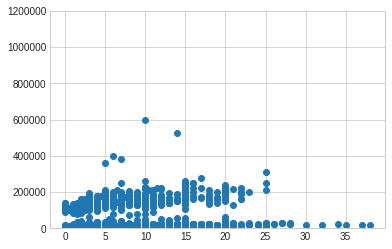

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Average salary based on years of experience
yoeFrame = (salaries.groupby(['Years of Experience', 'Base Salary'], as_index=False).mean().groupby('Years of Experience')['Base Salary'].mean().round().reset_index())
yoeFrame = yoeFrame.sort_values('Base Salary', ascending = False)
plt.scatter(salaries['Years of Experience'],salaries['Base Salary'])
plt.ylim(0,1200000)
plt.show()

# The data projects that the highest average base salary comes from people with 22 years of experience for a salary of ~$285k. Meanwhile, workers with only 2 years of experience were projected to recieve ~$130k as a base salary, which is almost half the salary of someone with 22 years of experience. 
# The scatter plot created shows an upward trend. As years of experience increases, we can see that average base salary does as well.

In [11]:
# Average Salary based on company
companyFrame = (salaries.groupby(['Company', 'Base Salary'], as_index=False).mean().groupby('Company')['Base Salary'].mean().round().reset_index())
companyFrame = companyFrame.sort_values('Base Salary', ascending = False)
companyFrame.head()

# Squarespace has by far the largest average base salary of ~600k per year. Followed up is ey with only half that amount. Interestingly, the 5th highest average base salary from oracle oci is three times smaller than that of squarespace. 

,Company,Base Salary
41,netflix,164059.0
53,spotify,148333.0
5,amazon.com,90300.0
42,nvidia,84800.0
64,walmart labs,77020.0


In [12]:
# Analyze Salary by Gender
genderFrame = (salaries.groupby(['Gender', 'Base Salary'], as_index=False).mean().groupby('Gender')['Base Salary'].mean().round().reset_index())
genderFrame
# According to the data: On average, men's base salaries were almost twice as much as women's base salaries. However, The unspecified gender category could either skew the average base salary towards women or towards men.

,Gender,Base Salary
0,Female,62961.0
1,Male,73867.0
2,Other,16600.0


In [13]:
rankFrame = (salaries.groupby(['Level','Years of Experience'])[['Base Salary']]).mean()
rankFrame

Base Salary
Level                       Years of Experience               
1                           1.0                    8250.000000
                            2.0                    9700.000000
                            5.0                   10000.000000
2                           1.0                   12000.000000
                            2.0                   10400.000000
                            3.0                  118000.000000
                            4.0                   13950.000000
3                           2.0                    9000.000000
                            2.5                   12200.000000
                            4.0                   15000.000000
                            5.0                   13400.000000
                            6.0                  130000.000000
4                           0.0                   10000.000000
                            2.0                  150000.000000
                            3.0                  168000.000000
                            5.0                   19000.000000
                            6.0                   79000.000000
                            10.0                  20000.000000
5                           2.0                   11850.000000
                            3.0                    7200.000000
                            5.0                   76600.000000
                            6.0                   18700.000000
                            7.0                   16333.333333
                            8.0                   16166.666667
                            9.0                   15200.000000
                            10.0                 101250.000000
                            12.0                  18000.000000
                            13.0                  16000.000000
                            16.0                 180000.000000
                            17.0                  12000.000000
...                                                        ...
VP                          15.0                  25000.000000
Vice President              15.0                  19000.000000
                            20.0                 175000.000000
                            25.0                  26500.000000
Vice President              20.0                  10000.000000
ZEN2                        1.0                   11500.000000
e6                          10.0                  20000.000000
g18                         7.0                    5300.000000
grade 10                    20.0                  20000.000000
grade 6                     2.0                   12000.000000
ii                          3.0                   11100.000000
l2                          2.0                   13000.000000
l3                          10.0                  12300.000000
l4                          10.0                  20000.000000
l5                          10.0                  16250.000000
l59                         0.0                  106500.000000
sde2                        2.0                  130000.000000
senior                      4.0                  110000.000000
                            11.0                  18200.000000
senior                      7.5                   16820.000000
senior associate            1.0                   11500.000000
senior engineer             5.0                   12000.000000
senior software engineer    6.0                   17000.000000
                            7.0                  165000.000000
senior software engineer II 12.0                  16100.000000
senior staff                19.0                 167000.000000
staff engineer              6.0                   13000.000000
swe1                        0.0                   10500.000000
vice president              7.5                   12000.000000
zen2                        3.0                    7000.000000

[1259 rows x 1 columns]

# Future and Conclusion 
Unfortunately this data set was extremely uncleanly, so a lot of data had to be replaced and removed
If I had more time I would have cleaned the location
